#**TITANIC SURVIVAL PREDICTION**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.xlsx to Titanic.xlsx


##**Analysing Dataset**

In [ ]:
data=pd.read_excel('Titanic.xlsx')

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
y=data['Survived']
x=data[['Age','Pclass','Sex','Embarked']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##**Filling NULL values**

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked']= data['Embarked'].fillna('Q')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [ ]:
data['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
data['Embarked'].replace(to_replace=['S','C','Q'],value=[1,2,3],inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,2


##**VISUALISING THE DATA**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


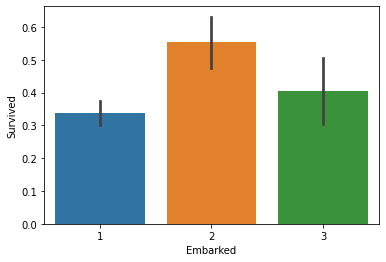

In [ ]:
import seaborn as sns
sns.barplot(x='Embarked',y='Survived',data=data)

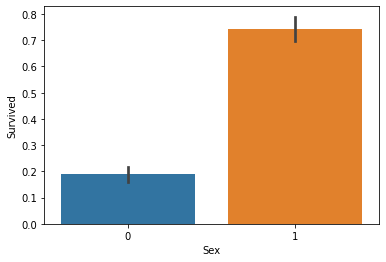

In [ ]:
sns.barplot(x='Sex',y='Survived',data=data)

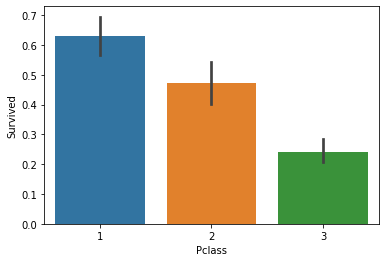

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=data)

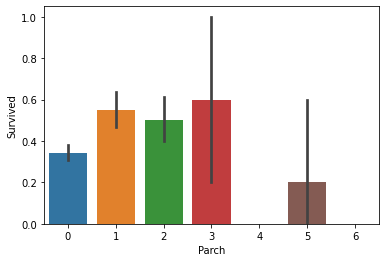

In [ ]:

sns.barplot(x='Parch',y='Survived',data=data)

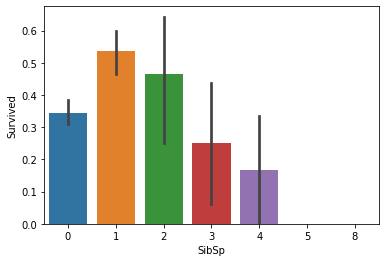

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=data)

#**TRAINING DATASET**

In [ ]:
x=data.iloc[:,[2,4,5,6,7,11]]
y=data.iloc[:,[1]]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,1
1,1,1,38.000000,1,0,2
2,3,1,26.000000,0,0,1
3,1,1,35.000000,1,0,1
4,3,0,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,1
887,1,1,19.000000,0,0,1
888,3,1,29.699118,1,2,1
889,1,0,26.000000,0,0,2


#**LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x,y)
pred=lgr.predict(x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score for Logistic Regression is : ',accuracy_score(y,pred))
print(confusion_matrix(y,pred))

Accuracy score for Logistic Regression is :  0.7991021324354658
[[465  84]
 [ 95 247]]


#**ACCURACY SCORE = 79.91%**

##**TRAINING A KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier().fit(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
accuracy = knn.score(x, y) 
print ("the KNN accuracy is",accuracy)

the KNN accuracy is 0.8372615039281706


#**ACCURACY SCORE FOR KNN MODEL IS 83.72%**

#**SVM MODEL**

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(x,y)
y_pred=classifier.predict(x)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



#**F1-SCORE= 79%**

#**K-MEANS CLUSTER**

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=100,init='k-means++',max_iter=300)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

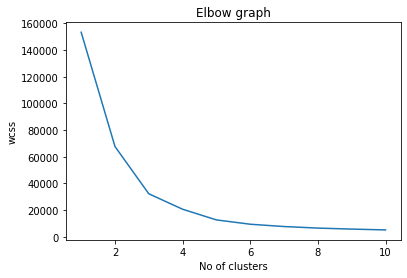

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow graph')
plt.xlabel("No of clusters")
plt.ylabel("wcss")

In [ ]:
kmeans=KMeans(n_clusters=3).fit(x)
pred=kmeans.fit_predict(x)
centroids=kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.57142857,  0.41558442, 14.64575758,  0.85714286,  0.63636364,
         1.27705628],
       [ 1.74324324,  0.32432432, 51.20945946,  0.32432432,  0.36486486,
         1.27702703],
       [ 2.35351562,  0.33203125, 30.27293716,  0.4296875 ,  0.27148437,
         1.43164063]])

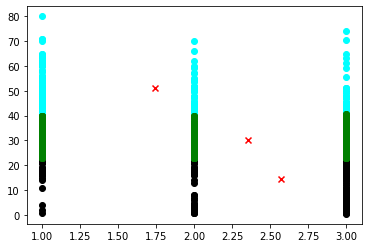

In [ ]:
plt.scatter(x.iloc[pred==0,0],x.iloc[pred==0,2],color='black')
plt.scatter(x.iloc[pred==1,0],x.iloc[pred==1,2],color='cyan')
plt.scatter(x.iloc[pred==2,0],x.iloc[pred==2,2],color='green')
plt.scatter(centroids[:,0],centroids[:,2],marker='x',color='red')